In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

# Extend PATH Variable
import sys
sys.path.append("../../../src/")

# NanoNets Simulation Tool
import nanonets
import nanonets_utils

import multiprocessing

#### Input Voltage

Number of Steps: 66667


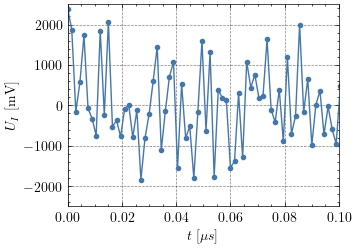

In [2]:
# Define Time Scale
step_size   = 1.5e-9
max_time    = 1e-4
time_steps  = np.arange(0,max_time,step_size)
N_steps     = len(time_steps)

print(f"Number of Steps: {N_steps}")

input_volt = np.random.normal(0.0,1,N_steps)

# Voltage Array
voltages        = np.zeros((N_steps, 9))
voltages        = np.zeros((N_steps, 9))
voltages[:,0]   = input_volt

# Plot
with plt.style.context(["science","bright","grid"]):
    
    plt.plot(time_steps*10**6, input_volt*1000, '.-')
    plt.xlabel("$t$ [$\mu s$]")
    plt.ylabel("$U_I$ [mV]")
    plt.xlim(0,0.1)
    plt.ylim(-2500,2500)
    plt.show()

#### Init Network

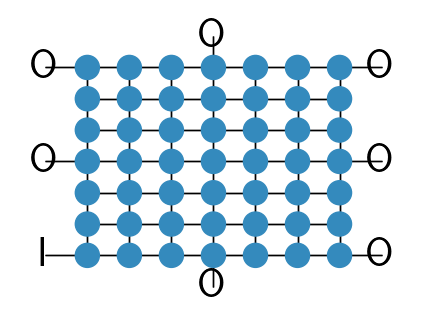

In [3]:
# Network Style
network_topology    = "cubic"
N_d                 = 7 
topology_parameter  = {
    "Nx"    : N_d,
    "Ny"    : N_d,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[3,0,0],[0,3,0],[6,0,0],[0,6,0],[6,3,0],[3,6,0],[6,6,0]]
}

# Topology Class
np_network_sim  = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter)
fig, ax         = nanonets_utils.display_network(np_network_sim, provide_electrode_labels=['I','O','O','O','O','O','O','O'],
                                    font_size=30, save_to_path='plots/network.pdf', width_scale=1.5, height_scale=1.5)

In [4]:
np_network_sim.G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, -1, -2, -3, -4, -5, -6, -7, -8))

In [5]:
np_network_sim.net_topology

array([[   1.,    1.,    7., -100., -100.],
       [-100.,    0.,    2.,    8., -100.],
       [-100.,    1.,    3.,    9., -100.],
       [   2.,    2.,    4.,   10., -100.],
       [-100.,    3.,    5.,   11., -100.],
       [-100.,    4.,    6.,   12., -100.],
       [   4.,    5.,   13., -100., -100.],
       [-100.,    0.,    8.,   14., -100.],
       [-100.,    1.,    7.,    9.,   15.],
       [-100.,    2.,    8.,   10.,   16.],
       [-100.,    3.,    9.,   11.,   17.],
       [-100.,    4.,   10.,   12.,   18.],
       [-100.,    5.,   11.,   13.,   19.],
       [-100.,    6.,   12.,   20., -100.],
       [-100.,    7.,   15.,   21., -100.],
       [-100.,    8.,   14.,   16.,   22.],
       [-100.,    9.,   15.,   17.,   23.],
       [-100.,   10.,   16.,   18.,   24.],
       [-100.,   11.,   17.,   19.,   25.],
       [-100.,   12.,   18.,   20.,   26.],
       [-100.,   13.,   19.,   27., -100.],
       [   3.,   14.,   22.,   28., -100.],
       [-100.,   15.,   21.,   2

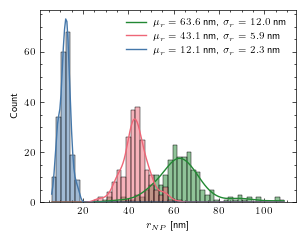

In [14]:
df      = pd.read_csv("np_sizes_exp.CSV", sep=';', names=['small','medium','large'])
df      = df/1000
r_means = df.mean().values
r_stds  = df.std().values

legend_labels = [f"$\mu_r = {round(r_means[i],1)}$"+" nm, "+f"$\sigma_r = {round(r_stds[i],1)}$"+" nm" for i in range(3)]
legend_labels.reverse()

with plt.style.context(["science","nature","bright"]):

    fig, ax = plt.subplots()
    ax      = sns.histplot(data=df, bins=50, ax=ax, kde=True)
    ax.legend(legend_labels)
    ax.set_xlabel("$r_{NP}$ [nm]")
    fig.savefig("plots/np_radius_dist.svg", bbox_inches='tight', transparent=True)

#### Load Data

In [10]:
def load_data(folder):

    mc_mean = []
    mc_stds = []

    for rem_d in np.arange(0,21,1):

        values = []
        
        for i in range(10):

            df  = pd.read_csv(f"{folder}mc_test_results_{rem_d}_{i}.csv", index_col=0)

            values.append(df.corr().loc['y_pred','y_test'])

        mc_mean.append(np.mean(values))
        mc_stds.append(np.std(values)/np.sqrt(10))
    
    return mc_mean, mc_stds

# ADD Equilibrium Time and skip first t in output

In [11]:
mc_mean, mc_stds        = load_data("data/lattice_without_disorder/")
mc_mean_C1, mc_stds_C1  = load_data("data/lattice_C_disorder/c1/")
mc_mean_C2, mc_stds_C2  = load_data("data/lattice_C_disorder/c2/")
mc_mean_C3, mc_stds_C3  = load_data("data/lattice_C_disorder/c3/")

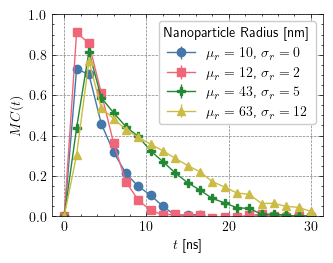

In [13]:
xvals = np.arange(0,21,1)*step_size*10**9

with plt.style.context(["science","bright","grid"]):

    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.errorbar(xvals, mc_mean, mc_stds, marker='o', label='$\mu_r = 10$, $\sigma_r = 0$')
    ax.errorbar(xvals, mc_mean_C1, mc_stds_C1, marker='s', label=f'$\mu_r = {int(r_means[0])}$, \t$\sigma_r = {int(r_stds[0])}$')
    ax.errorbar(xvals, mc_mean_C2, mc_stds_C2, marker='P', label=f'$\mu_r = {int(r_means[1])}$, \t$\sigma_r = {int(r_stds[1])}$')
    ax.errorbar(xvals, mc_mean_C3, mc_stds_C3, marker='^', label=f'$\mu_r = {int(r_means[2])}$, \t$\sigma_r = {int(r_stds[2])}$')
    ax.set_xlabel("$t$ [ns]")
    ax.set_ylabel("$MC(t)$")
    ax.legend(title='Nanoparticle Radius [nm]')
    ax.set_ylim(0,1)
    fig.savefig("plots/c_disorder.pdf", bbox_inches='tight')
    fig.savefig("plots/c_disorder.svg", bbox_inches='tight', transparent=True)

#### Output Matrix

In [41]:
W_out_falses  = pd.DataFrame()
W_out_trues   = pd.DataFrame()

for rem_d in range(0,26):
    
    # W_out_false           = np.array([np.loadtxt(f"data/lattice_without_disorder/Wout_{rem_d}_{i}.csv") for i in range(10)])
    W_out_false         = np.array([np.loadtxt(f"data/lattice_without_disorder/Wout_{rem_d}_{i}.csv") for i in range(10)]).flatten()
    # W_out_false         = 2*(W_out_false - np.min(W_out_false))/(np.max(W_out_false) - np.min(W_out_false)) - 1
    W_out_true          = np.array([np.loadtxt(f"data/lattice_C_disorder/c3/Wout_{rem_d}_{i}.csv") for i in range(10)]).flatten()*10000
    # W_out_true          = 2*(W_out_true - np.min(W_out_true))/(np.max(W_out_true) - np.min(W_out_true)) - 1

    # W_out_false           = 2*(W_out_false - np.min(W_out_false))/(np.max(W_out_false) - np.min(W_out_false)) - 1
    # W_out_false           = (W_out_false - np.mean(W_out_false))/np.std(W_out_false)
    W_out_false         = pd.DataFrame(W_out_false)
    W_out_true          = pd.DataFrame(W_out_true)

    W_out_false['rd']   = rem_d
    W_out_true['rd']    = rem_d
    W_out_falses        = pd.concat([W_out_falses, W_out_false])
    W_out_trues         = pd.concat([W_out_trues, W_out_true])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


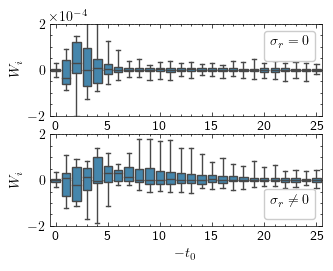

In [42]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure()
    ax  = fig.add_subplot(2,1,1)
    # ax  = sns.stripplot(data=W_outs, x='rd', y='value', color=nanonets_utils.blue_color)
    ax  = sns.boxplot(data=W_out_falses, x='rd', y=0, color=nanonets_utils.blue_color, whis=(0,100))
    ax.set_ylabel("$W_i$")
    ax.set_xticks([0,5,10,15,20,25])
    ax.set_ylim(-0.0002, 0.0002)
    ax.legend(title='$\sigma_r = 0$')
    ax.ticklabel_format(axis='y',style='sci', scilimits=(0,0))

    ax  = fig.add_subplot(2,1,2)
    ax  = sns.boxplot(data=W_out_trues, x='rd', y=0, color=nanonets_utils.blue_color, whis=(0,100))
    ax.set_xlabel("$-t_0$")
    ax.set_ylabel("$W_i$")
    ax.set_xticks([0,5,10,15,20,25])
    ax.set_ylim(-2, 2)
    ax.legend(title='$\sigma_r \\neq 0$')
    # ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0))
    fig.savefig("plots/c_disorder_wout_comparsion.pdf", bbox_inches='tight')

In [43]:
mc_mean_R1, mc_stds_R1  = load_data("data/lattice_R_disorder/r1/")
mc_mean_R2, mc_stds_R2  = load_data("data/lattice_R_disorder/r2/")
mc_mean_R3, mc_stds_R3  = load_data("data/lattice_R_disorder/r3/")

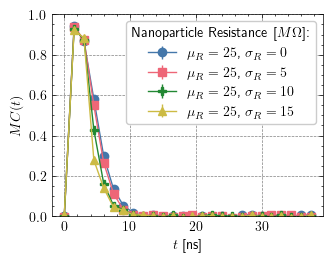

In [44]:
xvals = np.arange(0,26,1)*step_size*10**9

with plt.style.context(["science","bright","grid"]):

    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.errorbar(xvals, mc_mean, mc_stds, marker='o', label='$\mu_R = 25$, $\sigma_R = 0$')
    ax.errorbar(xvals, mc_mean_R1, mc_stds_R1, marker='s', label=f'$\mu_R = 25$, \t$\sigma_R = 5$')
    ax.errorbar(xvals, mc_mean_R2, mc_stds_R2, marker='P', label=f'$\mu_R = 25$, \t$\sigma_R = 10$')
    ax.errorbar(xvals, mc_mean_R3, mc_stds_R3, marker='^', label=f'$\mu_R = 25$, \t$\sigma_R = 15$')
    ax.set_xlabel("$t$ [ns]")
    ax.set_ylabel("$MC(t)$")
    ax.legend(title='Nanoparticle Resistance [$M\Omega$]:')
    ax.set_ylim(0,1)
    fig.savefig("plots/r_disorder.pdf", bbox_inches='tight')

#### Disordered Topology

[15, 21, 24, 33, 43, 46, 16, 38, 5, 10, 12, 25, 29, 41, 8, 18, 23, 34, 1, 14, 40, 39, 4, 32, 6, 13, 44, 30, 42, 48, 35, 0, 28, 36, 7, 20, 31, 37, 45, 19, 2, 22, 26, 27, 3, 11, 47, 17, 9, -1, -2, -3, -4, -5, -6, -7, -8]


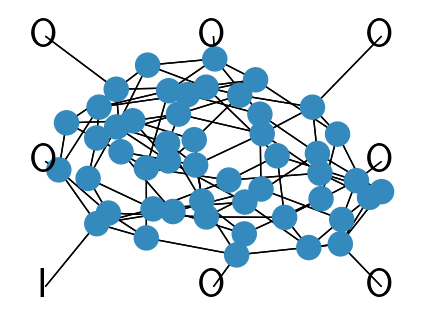

In [45]:
# Network Style
network_topology    = "random"
topology_parameter  = {
    "Np"    : 49,
    "Nj"    : 4,
    "e_pos" : [[-1,-1],[0,-1],[1,-1],[-1,0],[-1,1],[0,1],[1,0],[1,1]]
}

# Topology Class
np_network_sim  = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter)
fig, ax         = nanonets_utils.display_network(np_network_sim, provide_electrode_labels=['I','O','O','O','O','O','O','O'],
                                    font_size=30, save_to_path='plots/network.pdf', width_scale=1.5, height_scale=1.5)

In [46]:
mc_mean_topo, mc_stds_topo = load_data("data/disordered_topology/")

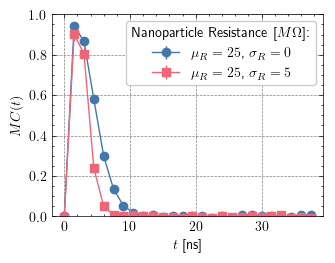

In [47]:
xvals = np.arange(0,26,1)*step_size*10**9

with plt.style.context(["science","bright","grid"]):

    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.errorbar(xvals, mc_mean, mc_stds, marker='o', label='$\mu_R = 25$, $\sigma_R = 0$')
    ax.errorbar(xvals, mc_mean_topo, mc_stds_topo, marker='s', label=f'$\mu_R = 25$, \t$\sigma_R = 5$')
    ax.set_xlabel("$t$ [ns]")
    ax.set_ylabel("$MC(t)$")
    ax.legend(title='Nanoparticle Resistance [$M\Omega$]:')
    ax.set_ylim(0,1)
    # fig.savefig("plots/r_disorder.pdf", bbox_inches='tight')

In [125]:
import networkx as nx

In [188]:
def random_graph_based_on_distance(N, con_distance=1):

    G       = nx.Graph()
    G.add_nodes_from(np.arange(N))

    while(not(nx.is_connected(G))):

        pos = {i : np.random.uniform(-1,1,2) for i in range(N)}

        distances = np.zeros((N,N))

        for node_1 in range(N):

            node_pos_1 = pos[node_1]

            for node_2 in range(node_1, N):

                node_pos_2 = pos[node_2]

                distances[node_1, node_2]   = np.sqrt((node_pos_1[0]-node_pos_2[0])**2 + (node_pos_1[1]-node_pos_2[1])**2)
                distances[node_2, node_1]   = distances[node_1, node_2] 

        for node, arr in enumerate(distances):
    
            node_neighbors = np.where(((arr > 0) & (arr < con_distance)))[0]

            for neighbor in node_neighbors:
                        
                G.add_edge(node, neighbor)
    
    return G, pos

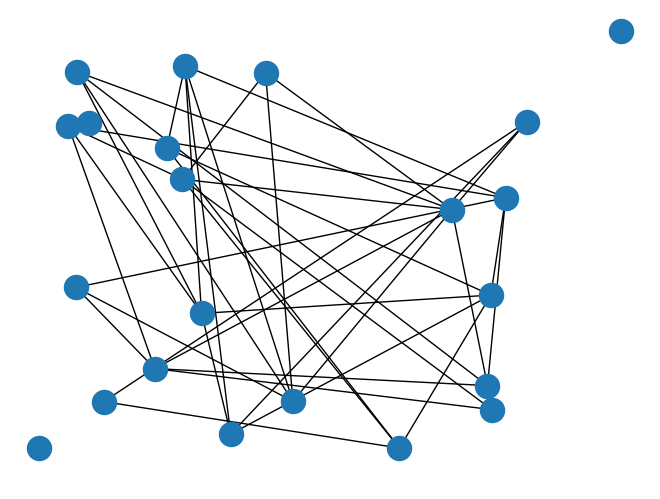

In [300]:
G, pos = random_graph_based_on_distance(20, 0.1)
G.add_node(-1)
G.add_node(-2)
pos[-1] = [-1,-1]
pos[-2] = [1,1]

nx.draw(G, pos)

In [126]:
N       = 25
max_NN  = 6
pos     = {i : np.random.uniform(-1,1,2) for i in range(N)}
G       = nx.DiGraph()
G.add_nodes_from(np.arange(N))

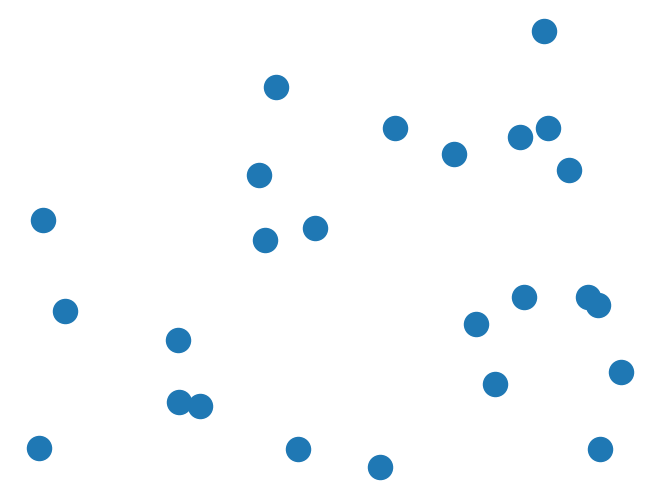

In [127]:
nx.draw(G,pos)

In [128]:
distances = np.zeros((N,N))

for node_1 in range(N):

    node_pos_1 = pos[node_1]

    for node_2 in range(node_1, N):

        node_pos_2 = pos[node_2]

        distances[node_1, node_2]   = np.sqrt((node_pos_1[0]-node_pos_2[0])**2 + (node_pos_1[1]-node_pos_2[1])**2)
        distances[node_2, node_1]   = distances[node_1, node_2] 

In [129]:
# for node, arr in enumerate(distances):
    
#     node_neighbors  = np.argsort(arr)[1:]
#     nth_neighbor    = 0

#     for neighbor in node_neighbors:
                
#         G.add_edge(node, neighbor)

#         if nx.is_planar(G) == False:

#             G.remove_edge(node, neighbor)

#         else:
            
#             nth_neighbor += 1
        
#         if nth_neighbor >= max_NN:
#             break       

In [130]:
for node, arr in enumerate(distances):
    
    node_neighbors = np.where(((arr > 0) & (arr < 0.5)))[0]
    # nth_neighbor    = 0

    for neighbor in node_neighbors:
                
        G.add_edge(node, neighbor)

        # if nx.is_planar(G) == False:

        #     G.remove_edge(node, neighbor)

        # else:
            
        #     nth_neighbor += 1


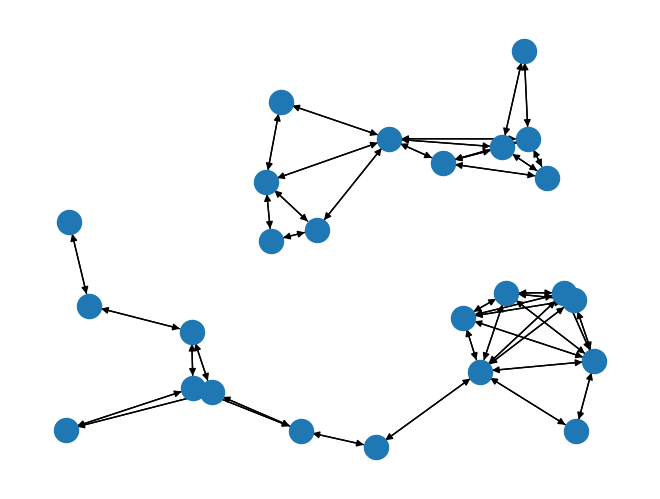

In [131]:
nx.draw(G,pos)